In [1]:
import seaborn
from collections import Counter

In [2]:
%run tfa_phase1.py


    create or load W2V model and build fashion vocabulary:
    `df, model = create_TrendDF(start_year, end_year)`
    


In [3]:
dfX, model_base = create_TrendDF(2009, 2012)

now loading year 2009
now loading year 2010
now loading year 2011
now loading year 2012
loading pre-trained Word2Vec model
Now creating bigrams
Creating TrendDF for years 2009 to 2012
Creating counter of all words/bigrams


In [4]:
dfX.df.head()

,post_id,photo_desc,username,location,datetime,month,quarter,year,tokenized_descs,bigrammified_descs
8486,59462,\nFabulous outfit to ring in the fabulous New ...,underthestares,"Los Angeles, USA",2009-01-01,1,1,2009,"[fabulous, outfit, to, ring, in, the, fabulous...","[fabulous, outfit, to, ring, in, the, fabulous..."
8487,59463,\nplaying dress up,imastar,"Marikina, Philippines",2009-01-01,1,1,2009,"[playing, dress, up]","[playing_dress, up]"
8488,59464,\noff to see my friends today.\nand to complim...,gladful,NaN,2009-01-01,1,1,2009,"[off, to, see, my, friends, today, and, to, co...","[off, to, see, my, friends, today, and, to, co..."
8489,59465,\nvacay-appropriate attire i enjoy,gladful,NaN,2009-01-01,1,1,2009,"[vacayappropriate, attire, i, enjoy]","[vacayappropriate, attire, i, enjoy]"
8490,59466,"\nchristmas is for shoes. <3\nhappy new year, ...",sweetlilducky,"Makati, Philippines",2009-01-01,1,1,2009,"[christmas, is, for, shoes, 3, happy, new, yea...","[christmas, is, for, shoes, 3, happy, new, yea..."


In [5]:
len(dfX.df)

535979

In [6]:
def make_year(df, year):
    mask = df.year == year
    return df.loc[mask]

def make_quarter(df, year, quarter):
    year_df = make_year(df, year)
    mask = year_df.quarter == quarter
    return year_df.loc[mask]

In [7]:
df2009 = TrendDF(make_year(dfX.df, 2009))
df2010 = TrendDF(make_year(dfX.df, 2010))
df2011 = TrendDF(make_year(dfX.df, 2011))
df2012 = TrendDF(make_year(dfX.df, 2012))

Creating TrendDF for years 2009 to 2009
Creating counter of all words/bigrams
Creating TrendDF for years 2010 to 2010
Creating counter of all words/bigrams
Creating TrendDF for years 2011 to 2011
Creating counter of all words/bigrams
Creating TrendDF for years 2012 to 2012
Creating counter of all words/bigrams


In [8]:
df2012.df.head()


,post_id,photo_desc,username,location,datetime,month,quarter,year,tokenized_descs,bigrammified_descs
3885,380491,\nfour eyes isnt an insult anymore. : ),MACAW,"Long Beach, CA",2012-02-26,2,1,2012,"[four, eyes, isnt, an, insult, anymore]","[four, eyes, isnt, an, insult, anymore]"
5431,382038,\ndress up your jeans and white t these bad bo...,MACAW,"Long Beach, CA",2012-02-26,2,1,2012,"[dress, up, your, jeans, and, white, t, these,...","[dress, up, your, jeans, and, white, t, these,..."
17823,407824,\nsimple but colorful and chic,MACAW,"Long Beach, CA",2012-02-22,2,1,2012,"[simple, but, colorful, and, chic]","[simple, but, colorful, and, chic]"
3176,423177,\nusually im not a big fan of red and green to...,MACAW,"Long Beach, CA",2012-02-26,2,1,2012,"[usually, im, not, a, big, fan, of, red, and, ...","[usually, im, not, a, big, fan, of, red, and, ..."
14144,434144,\nLooking for the perfect cocktail dress? Look...,alyssabird,"San Francisco, CA",2012-12-16,12,4,2012,"[looking, for, the, perfect, cocktail, dress, ...","[looking, for, the, perfect, cocktail_dress, l..."


In [9]:
len(df2009.df), len(df2010.df), len(df2011.df), len(df2012.df)

(92705, 134573, 152385, 156316)

In [10]:
model_base.most_similar('dress')


[('skirt', 0.8446176052093506),
 ('romper', 0.843269944190979),
 ('jumpsuit', 0.8005801439285278),
 ('tunic', 0.7705355882644653),
 ('blouse', 0.7630826234817505),
 ('playsuit', 0.752336859703064),
 ('shirtdress', 0.7464975118637085),
 ('minidress', 0.7435935735702515),
 ('swimsuit', 0.7295054197311401),
 ('sundress', 0.7276372909545898)]

In [11]:
model_base.most_similar('cotton')

[('rayon', 0.8614826202392578),
 ('silk', 0.8144431114196777),
 ('polyester', 0.7934154868125916),
 ('linen', 0.7889617085456848),
 ('modal', 0.7685330510139465),
 ('lycra', 0.7622313499450684),
 ('poly', 0.7615510821342468),
 ('viscose', 0.7574373483657837),
 ('acrylic', 0.7527126669883728),
 ('twill', 0.7433853149414062)]

In [12]:
model_base.most_similar('zara')

[('hm', 0.9078248739242554),
 ('topshop', 0.9016311168670654),
 ('forever21', 0.8535812497138977),
 ('mango', 0.8446725010871887),
 ('uniqlo', 0.8332536220550537),
 ('bershka', 0.8297337293624878),
 ('uo', 0.8148353099822998),
 ('f21', 0.8100910186767578),
 ('primark', 0.8056572079658508),
 ('stradivarius', 0.7968490123748779)]

In [13]:
dfX.find_all_bigrams_above_threshold(500)

Counter({'ankle_boots': 1161,
         'combat_boots': 582,
         'crop_top': 802,
         'denim_shirt': 687,
         'denim_shorts': 1132,
         'floral_dress': 973,
         'floral_skirt': 510,
         'fur_vest': 559,
         'harem_pants': 747,
         'high_heels': 1158,
         'lace_dress': 765,
         'lace_top': 687,
         'leather_skirt': 540,
         'maxi_dress': 1758,
         'maxi_skirt': 1308,
         'mini_dress': 1144,
         'mini_skirt': 622,
         'pencil_skirt': 947,
         'pleated_skirt': 535,
         'print_dress': 548,
         'skinny_jeans': 2260,
         'summer_dress': 743,
         'tank_top': 2027,
         'vintage_dress': 1257})

In [14]:
#find all garment phrases mentioned in at least 1 out of 5000 posts.
top_2009 = df2009.find_all_bigrams_above_threshold(.0005*len(df2009.df))
top_2012 = df2012.find_all_bigrams_above_threshold(.0005*len(df2009.df))

In [15]:
top_2009


Counter({'21_dress': 74,
         '21_shoes': 57,
         'ankle_boots': 332,
         'ballet_flats': 95,
         'boyfriend_blazer': 74,
         'boyfriend_jeans': 61,
         'bubble_skirt': 47,
         'calfskin_bag': 66,
         'chanel_bag': 89,
         'combat_boots': 57,
         'cowboy_boots': 118,
         'crop_top': 89,
         'denim_shirt': 80,
         'denim_shorts': 167,
         'denim_skirt': 70,
         'denim_vest': 111,
         'flat_shoes': 70,
         'floral_dress': 180,
         'floral_skirt': 110,
         'fur_vest': 86,
         'gladiator_heels': 49,
         'gladiator_sandals': 157,
         'harem_pants': 220,
         'high_boots': 71,
         'high_heels': 188,
         'highwaisted_skirt': 61,
         'hm_bag': 95,
         'hm_boots': 57,
         'hm_dress': 105,
         'hm_jeans': 66,
         'hm_shirt': 57,
         'hm_shoes': 148,
         'hm_skirt': 113,
         'jean_shorts': 65,
         'knee_boots': 52,
         'lace_d

In [16]:
top_2012

Counter({'52kg_top': 88,
         'aline_skirt': 47,
         'ankle_booties': 82,
         'ankle_boots': 308,
         'ballet_flats': 93,
         'biker_boots': 47,
         'bodycon_dress': 76,
         'boyfriend_jeans': 133,
         'chambray_shirt': 80,
         'chiffon_blouse': 73,
         'chiffon_dress': 88,
         'chiffon_skirt': 86,
         'chiffon_top': 49,
         'circle_skirt': 88,
         'cocktail_dress': 86,
         'collared_shirt': 53,
         'colored_jeans': 75,
         'colored_pants': 54,
         'combat_boots': 187,
         'cotton_dress': 47,
         'cowboy_boots': 81,
         'crop_top': 365,
         'cropped_top': 101,
         'cutoff_shorts': 47,
         'denim_jeans': 64,
         'denim_shirt': 234,
         'denim_shorts': 306,
         'denim_skirt': 56,
         'denim_vest': 129,
         'dot_dress': 57,
         'envelope_clutch': 53,
         'flat_sandals': 55,
         'flat_shoes': 73,
         'floral_blouse': 50,
       

In [17]:
#phrases that were popular in 2012 but not in 2009 - suggestive of potential trends
print [g for g in top_2012 if g not in top_2009]
potential_trends_2012 = [g for g in top_2012 if g not in top_2009]

['peplum_top', 'rain_boots', 'floral_shorts', 'midi_skirt', 'peplum_skirt', 'dot_dress', 'knit_sweater', 'palazzo_pants', 'sheer_top', 'shift_dress', 'riding_boots', 'sleeveless_dress', 'cocktail_dress', 'tulle_skirt', 'style_dress', 'oversized_sweater', 'printed_pants', 'small_pants', 'sweater_dress', 'floral_blouse', 'chiffon_dress', 'peplum_dress', 'print_skirt', 'chiffon_blouse', 'silk_blouse', 'platform_sandals', 'print_blouse', 'skater_dress', 'print_pants', 'colored_pants', 'collared_shirt', 'envelope_clutch', 'long_dress', 'perfect_dress', 'wrap_dress', 'highwaisted_shorts', 'leather_shorts', 'circle_skirt', 'biker_boots', 'cotton_dress', 'chiffon_top', 'platform_heels', 'bodycon_dress', 'printed_dress', 'leather_vest', 'long_skirt', 'floral_pants', 'waist_shorts', 'sole_heels', 'lace_blouse', 'colored_jeans', '52kg_top', 'floral_top', 'pretty_dress', 'pleated_skirt', 'knit_top', 'vintage_blouse', 'cropped_top', 'full_skirt', 'chambray_shirt', 'velvet_dress', 'denim_jeans', 'an

In [18]:
%run Trend.py


In [19]:

def make_trends(trend_list_str):
    trend_list_obj = []
    for item in trend_list_str:
        item_split = item.split('_')
        item = Trend('{} {}'.format(item_split[0], item_split[1]))
        trend_list_obj.append(item)
    return trend_list_obj
trend_list_2012 = make_trends(potential_trends_2012)

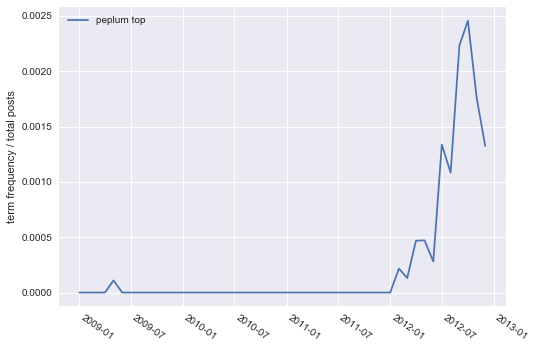

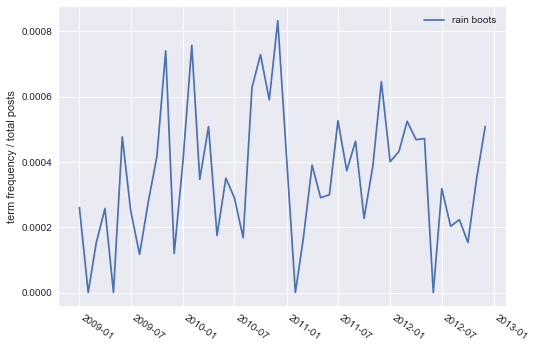

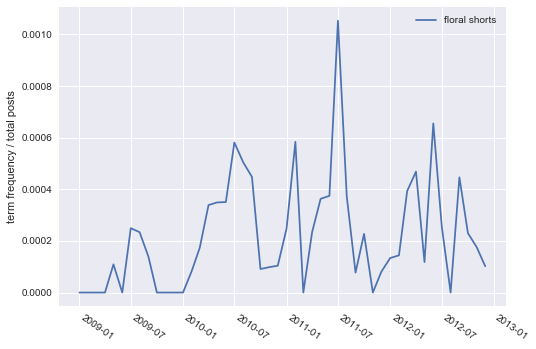

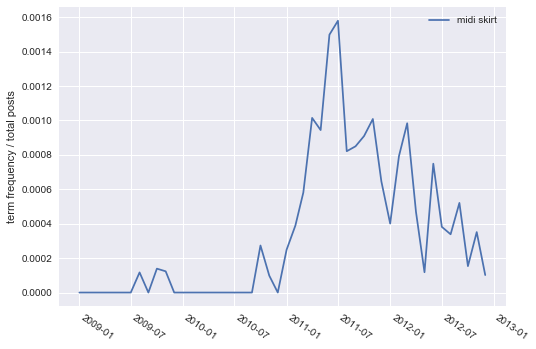

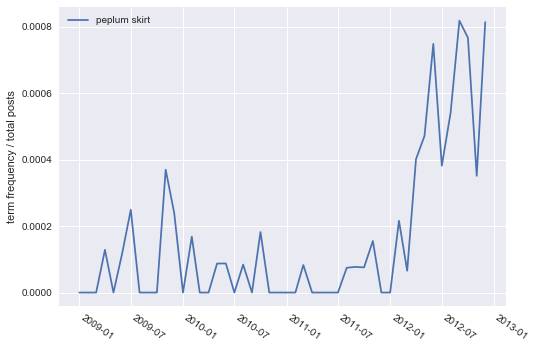

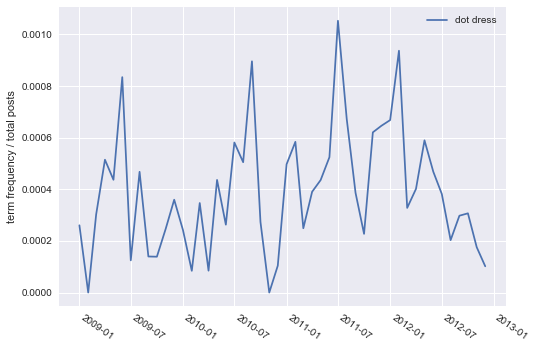

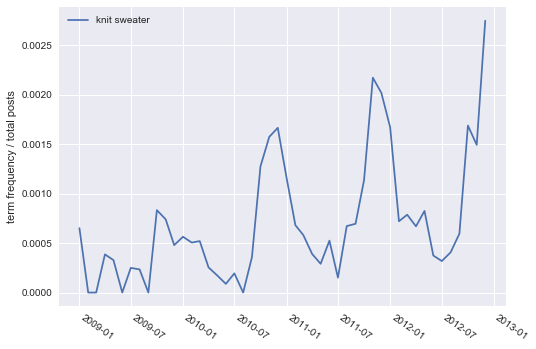

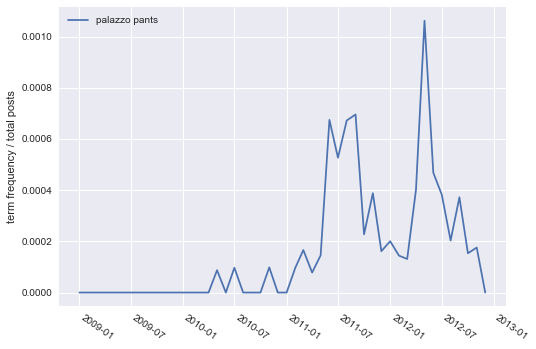

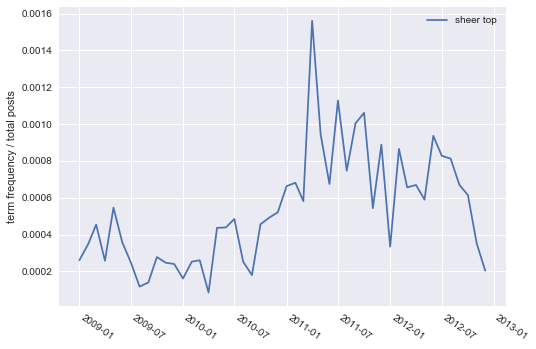

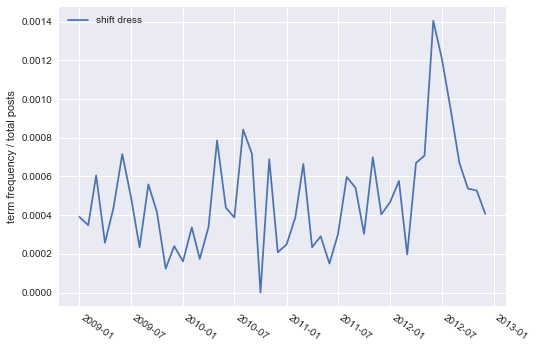

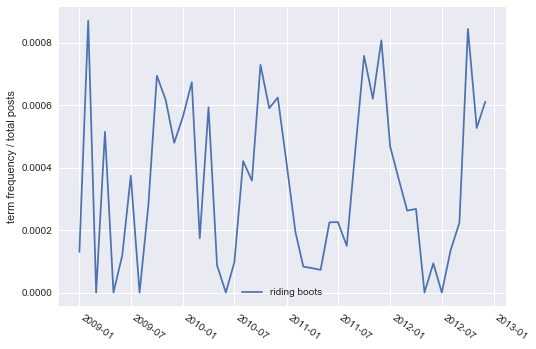

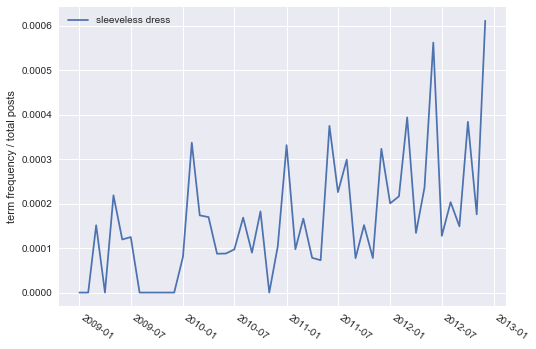

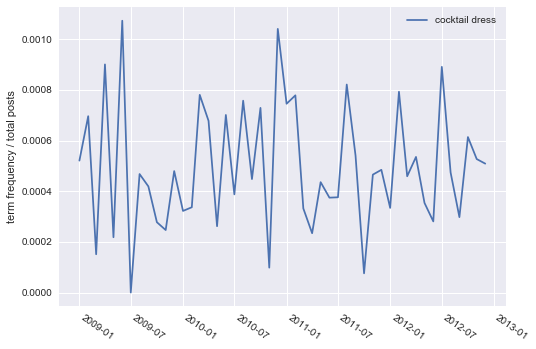

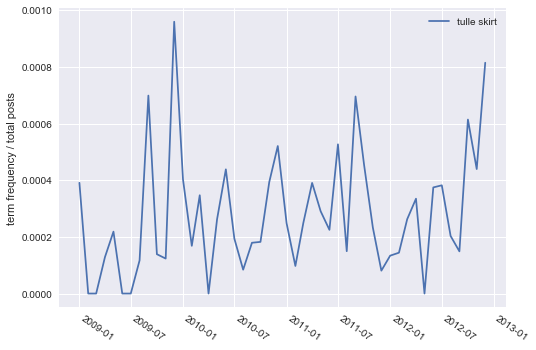

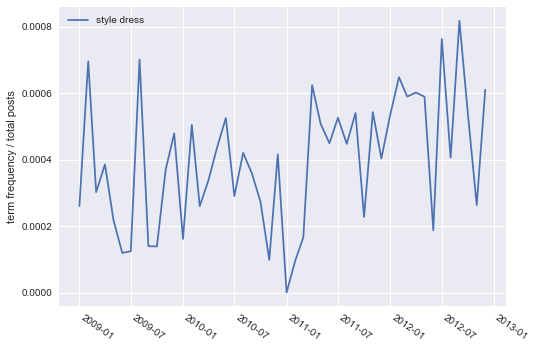

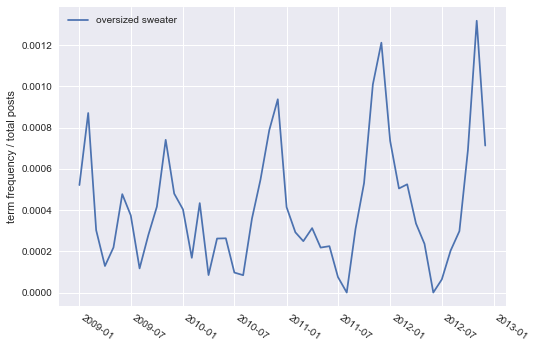

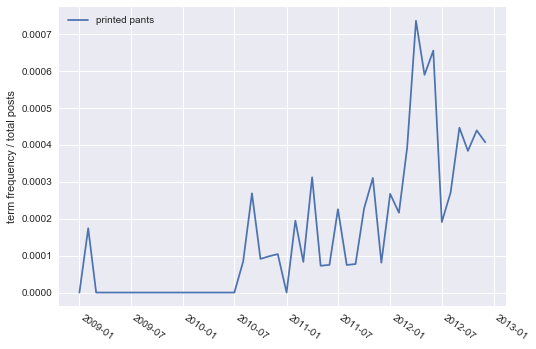

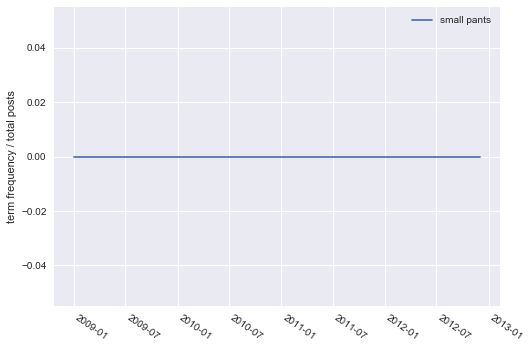

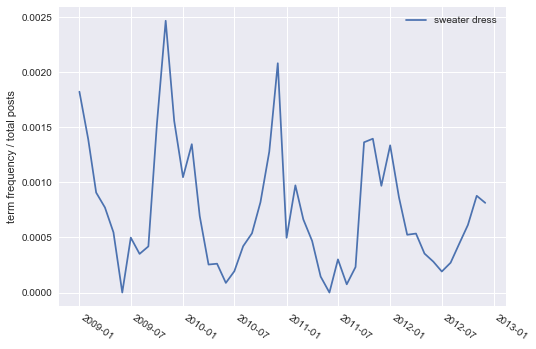

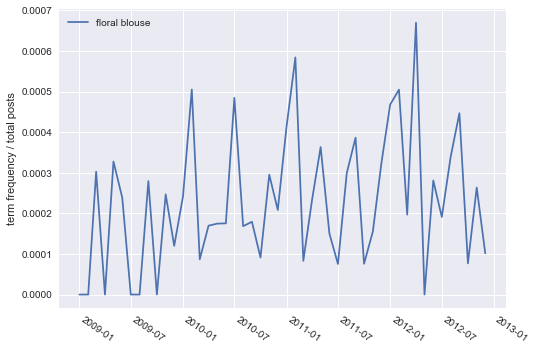

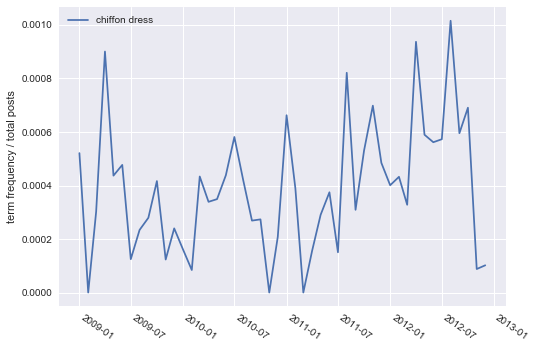

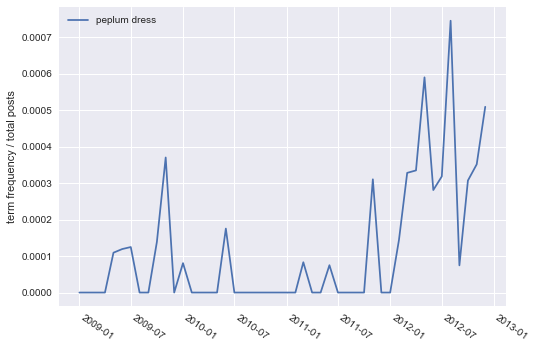

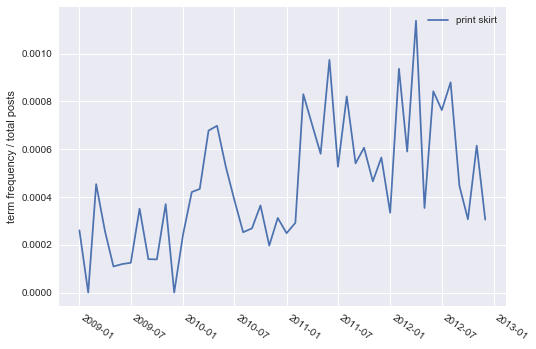

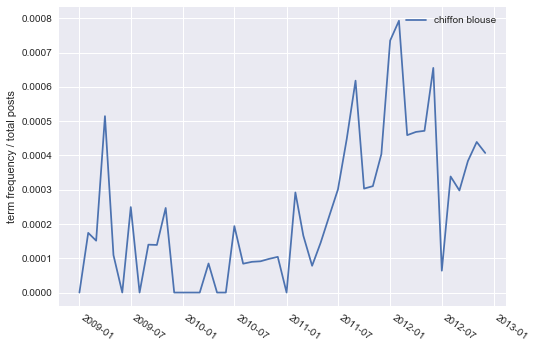

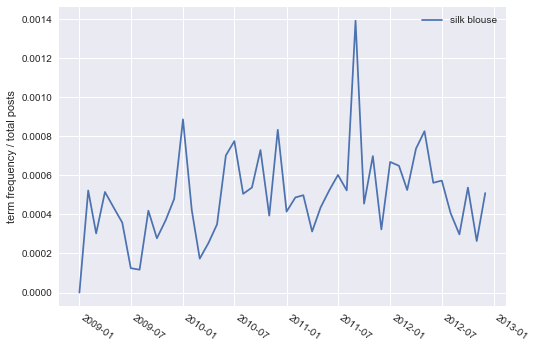

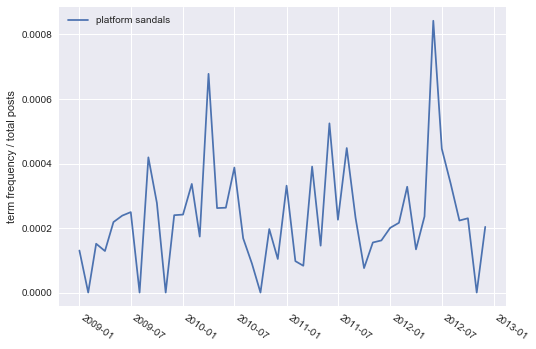

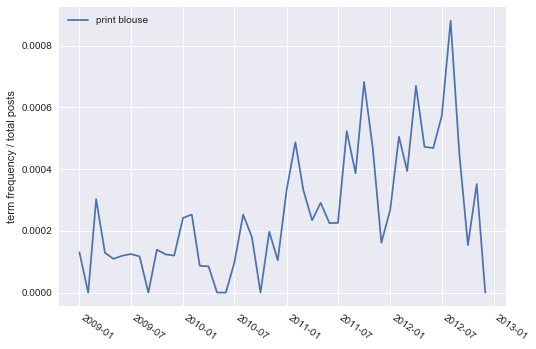

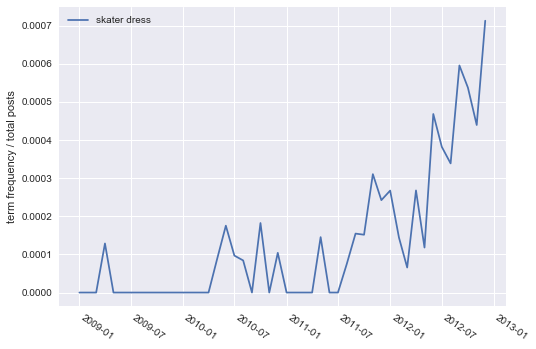

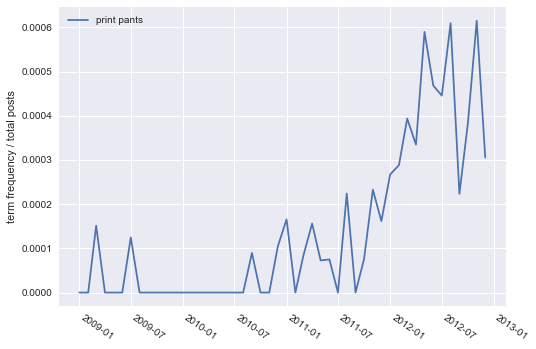

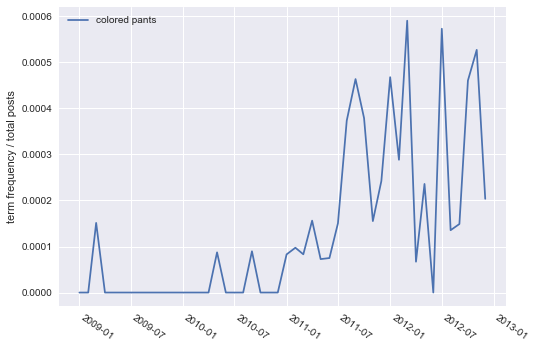

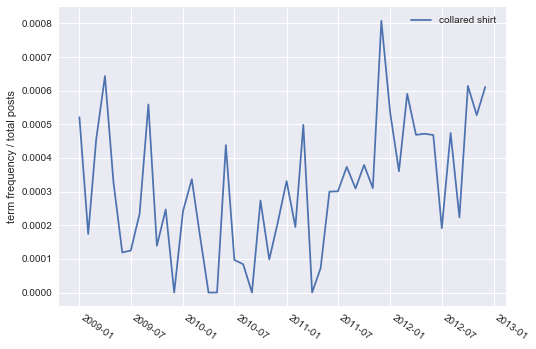

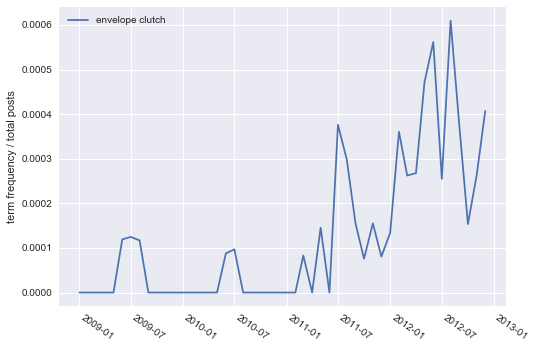

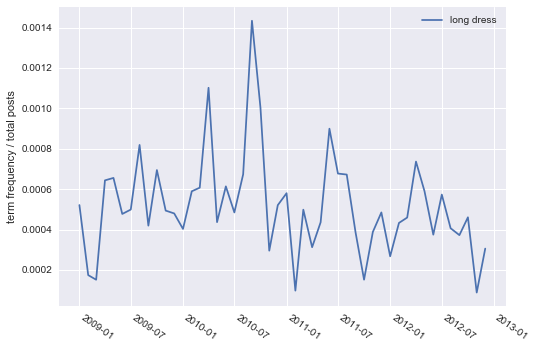

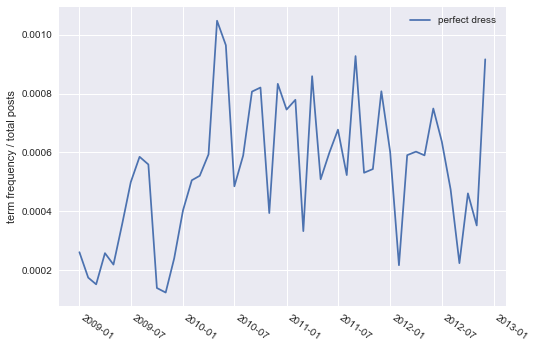

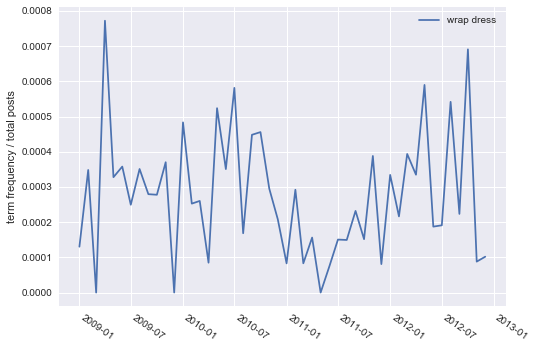

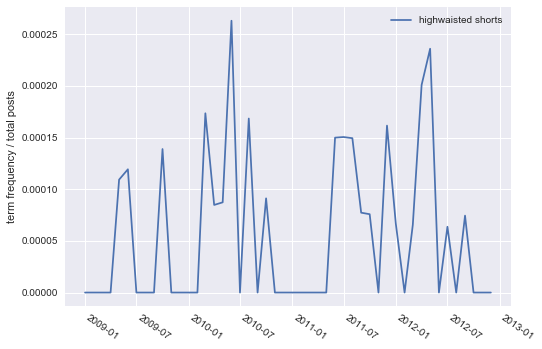

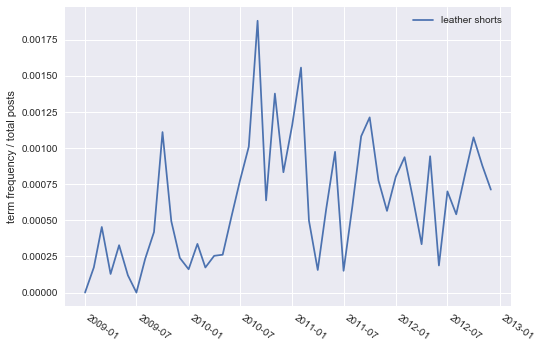

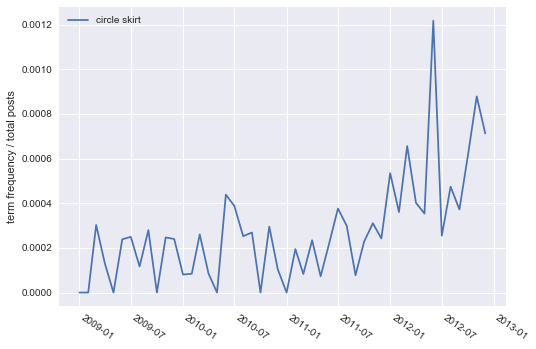

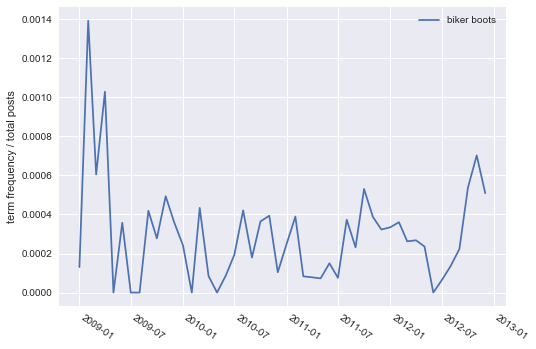

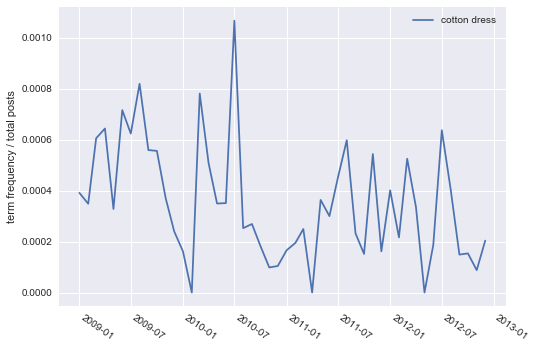

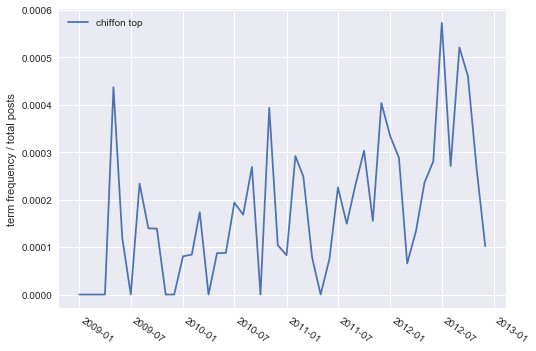

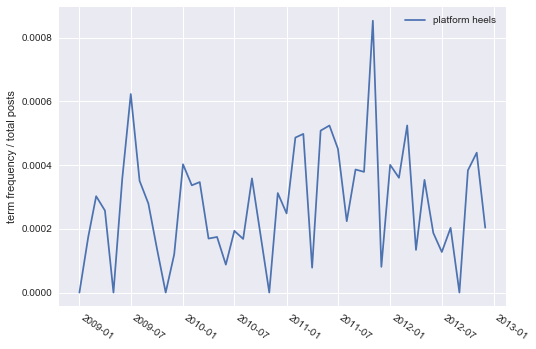

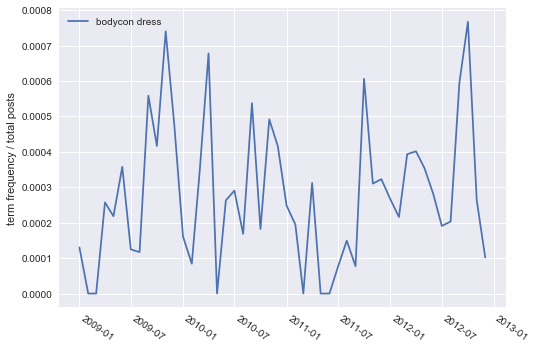

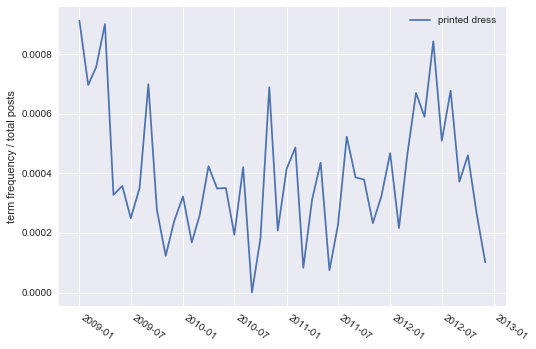

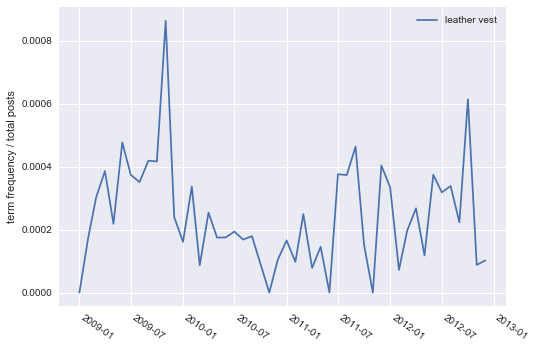

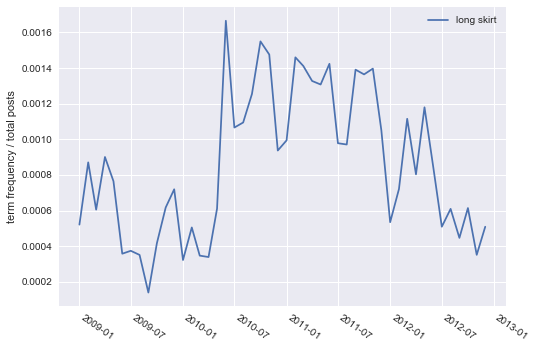

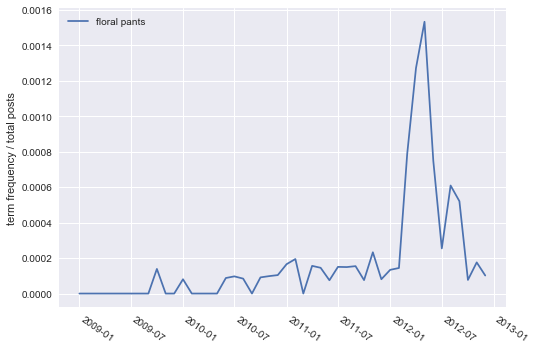

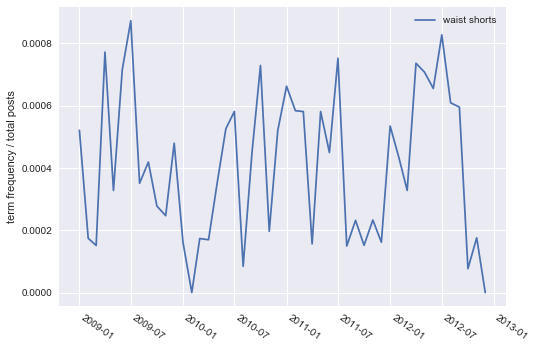

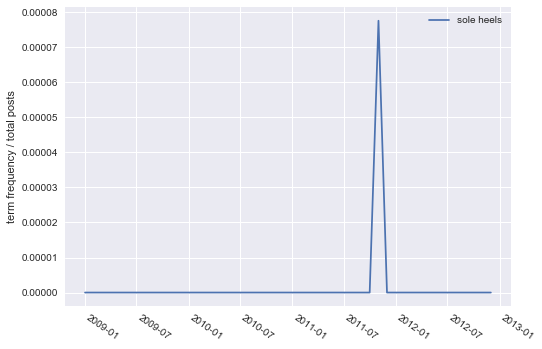

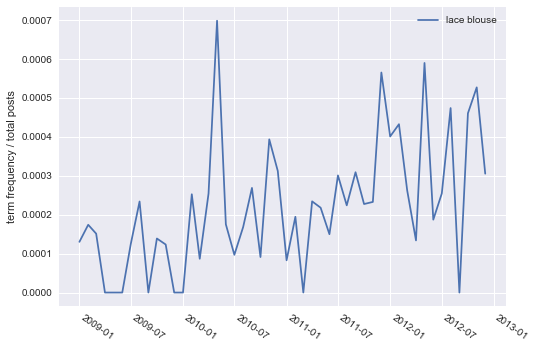

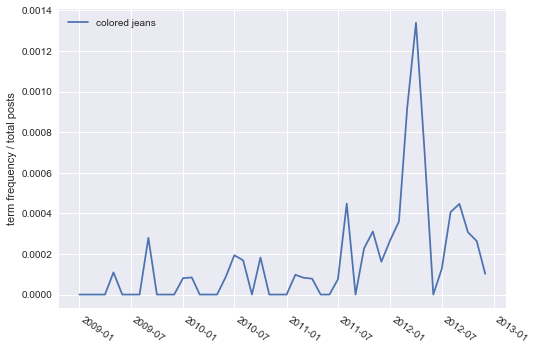

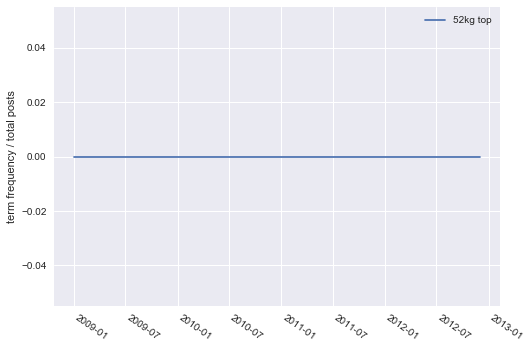

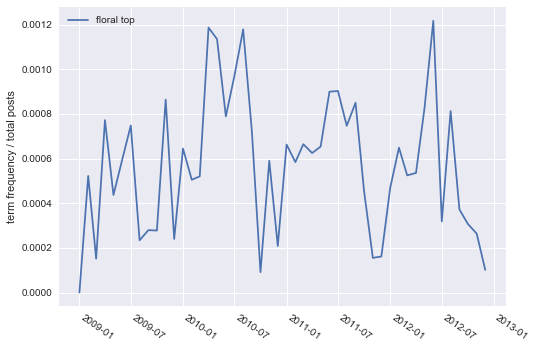

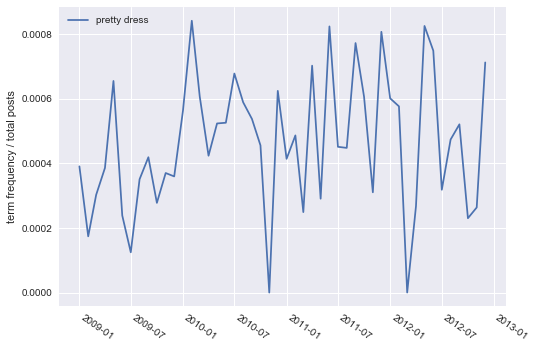

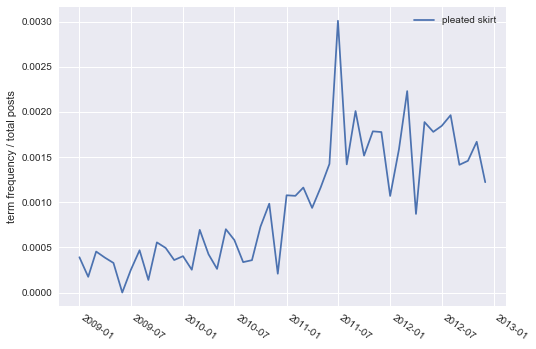

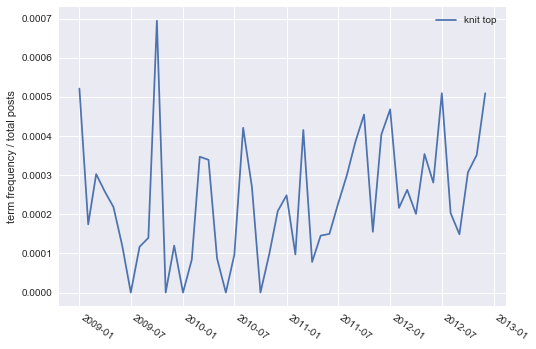

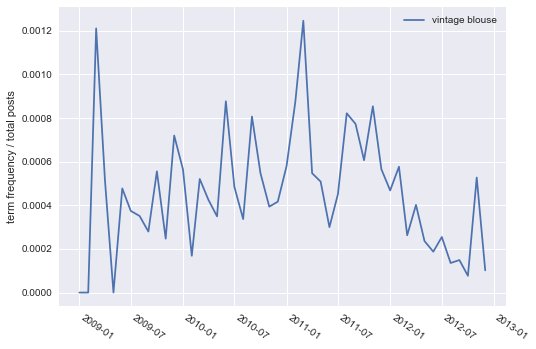

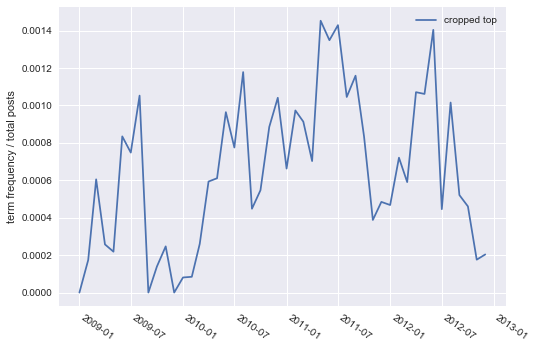

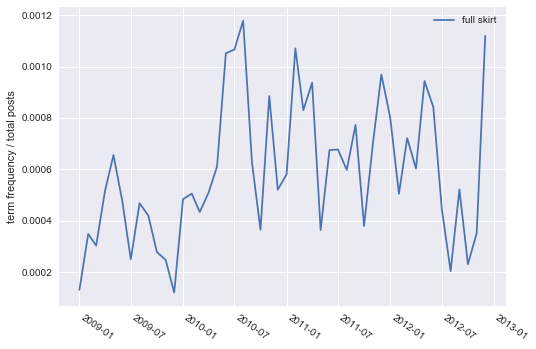

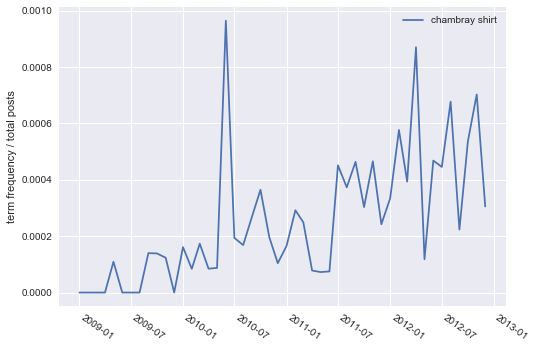

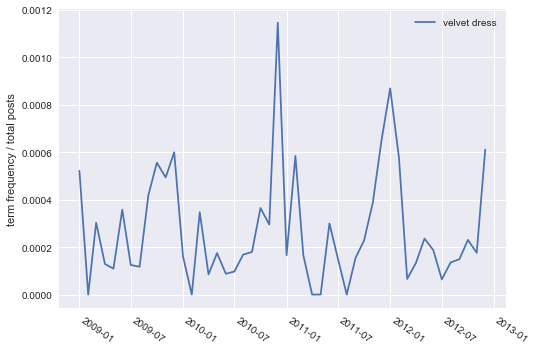

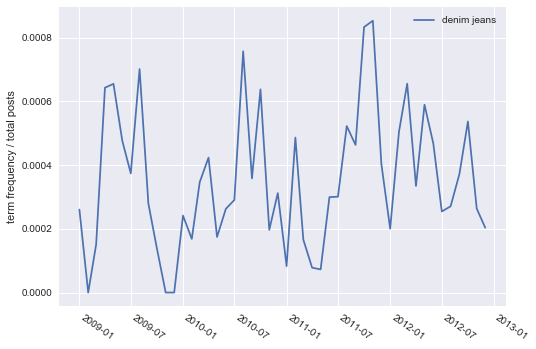

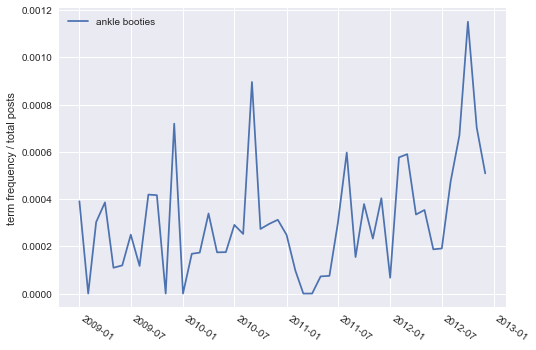

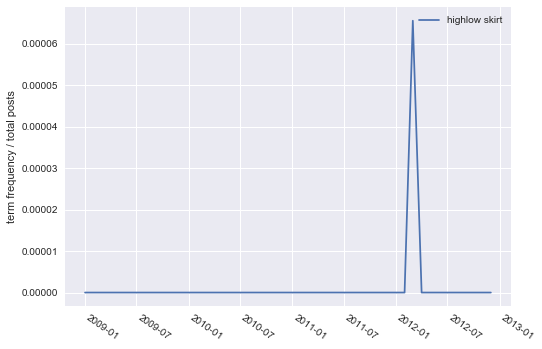

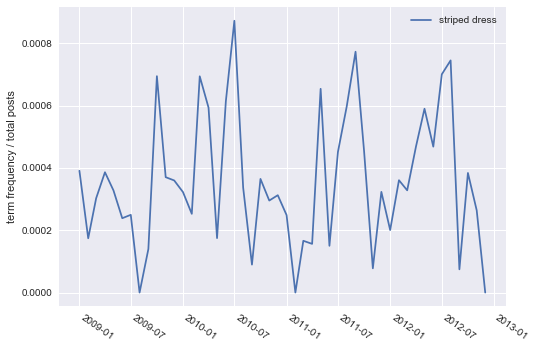

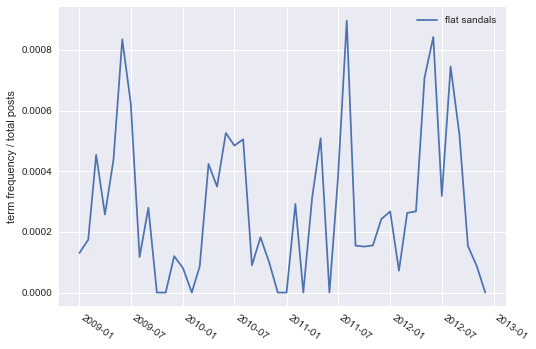

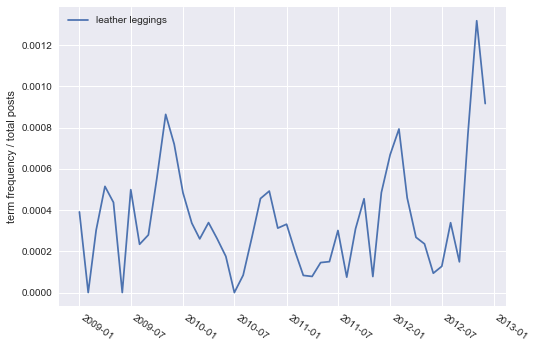

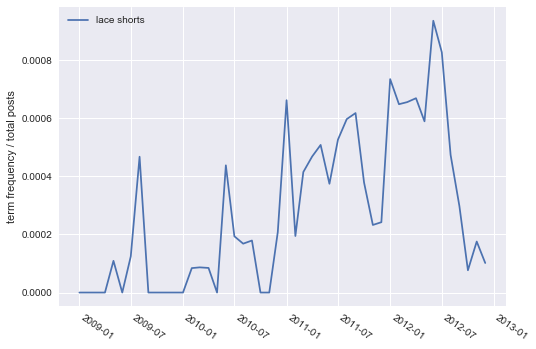

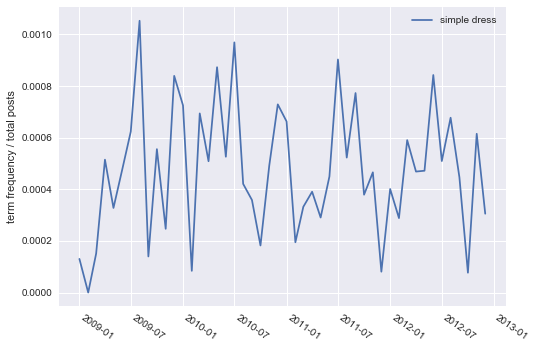

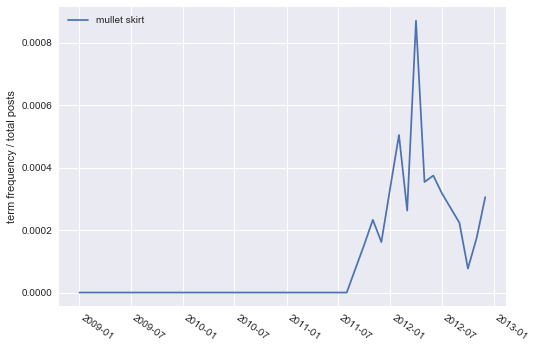

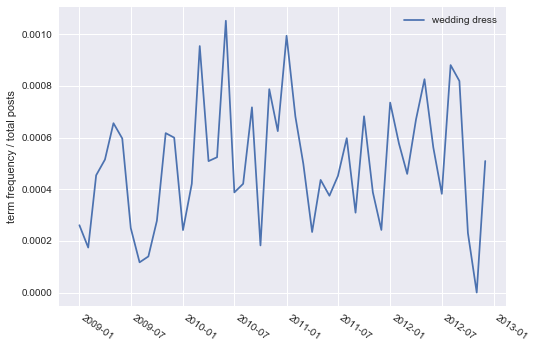

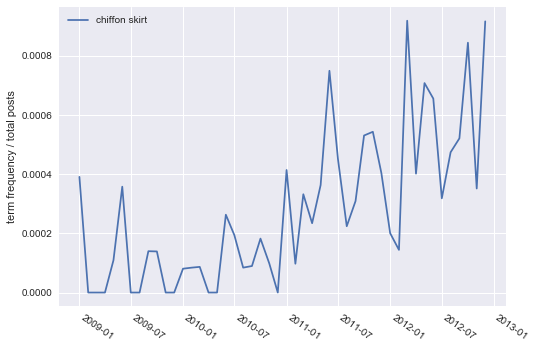

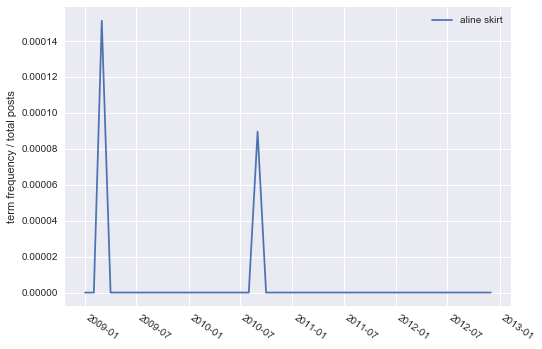

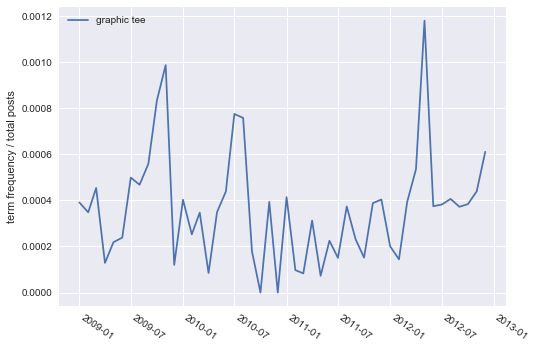

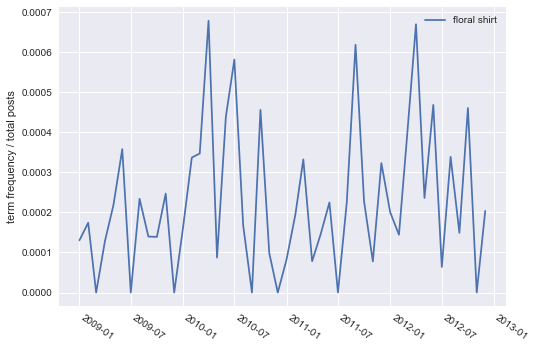

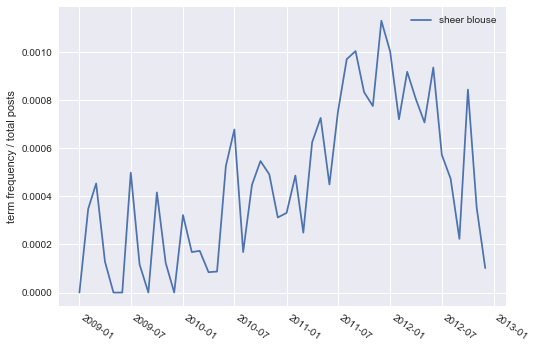

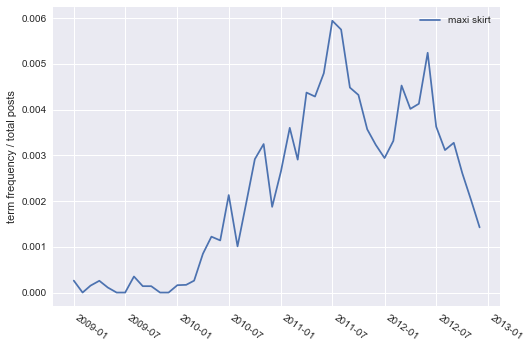

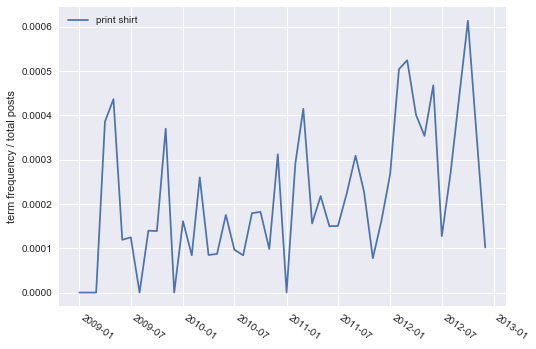

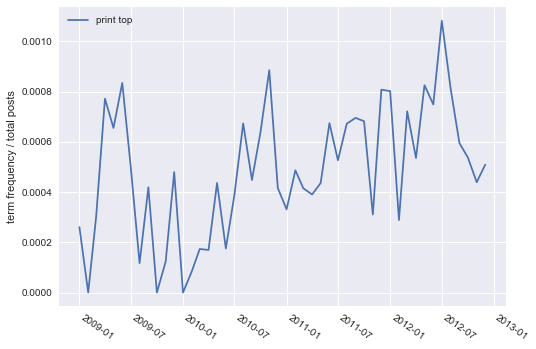

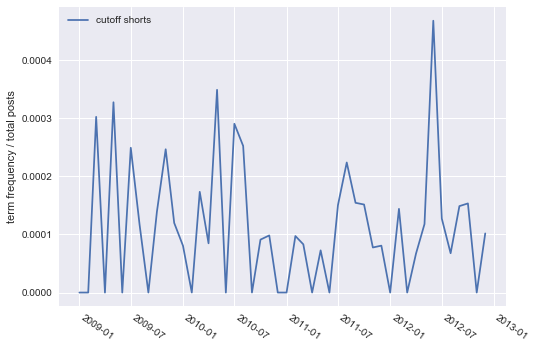

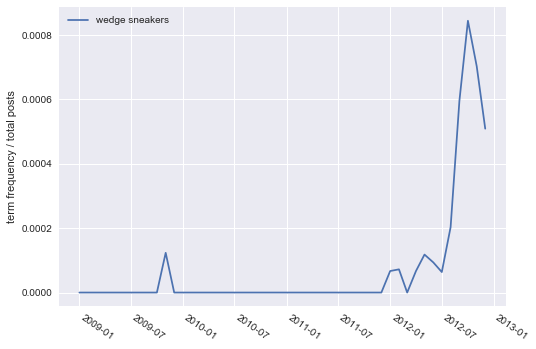

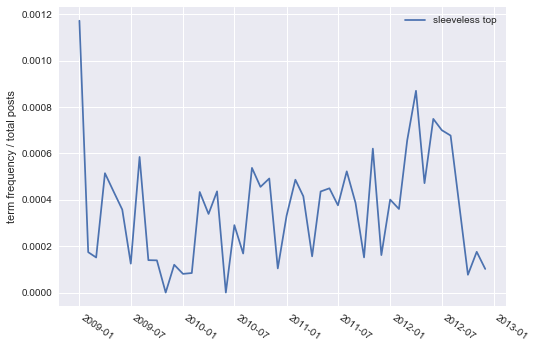

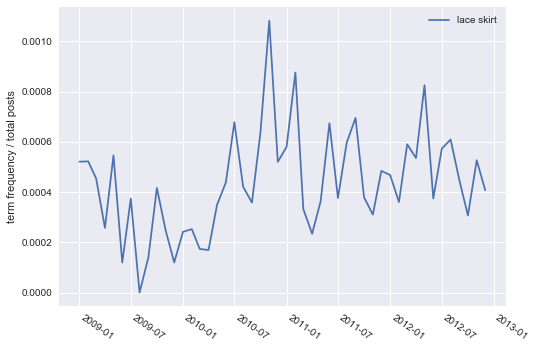

In [20]:
def show_plot(highlight_year=None):
    plt.legend()
    plt.xticks(rotation = -35, ha='left')
    if highlight_year:
        plt.axvspan(pd.datetime(highlight_year, 1, 1), pd.datetime(highlight_year + 1, 1, 1), color='grey', alpha=0.6)
        plt.axvspan(pd.datetime(highlight_year, 1, 1), pd.datetime(highlight_year + 2, 1, 1), color='grey', alpha=0.3)
    seaborn.set(rc={'figure.facecolor':'white'})
    plt.get_cmap('spring')
    plt.ylabel("term frequency / total posts")
    plt.show()

for trend in trend_list_2012:
    trend.plot_by_month(dfX.df, 1, 2009, 48)
    plt.legend()
    show_plot()

    

In [21]:
#what are some popular adjectives from 2012?
descriptors_2012 = []
for item in trend_list_2012:
    item_s = item.phrase.split()
    descriptors_2012.append(item_s[0])
count_descriptors = Counter(descriptors_2012)

[(k, v) for k, v in count_descriptors.iteritems() if v > 1]

[('lace', 3),
 ('chiffon', 4),
 ('sheer', 2),
 ('long', 2),
 ('platform', 2),
 ('print', 5),
 ('printed', 2),
 ('floral', 5),
 ('knit', 2),
 ('sleeveless', 2),
 ('colored', 2),
 ('leather', 3),
 ('peplum', 3)]

In [22]:
[(k, v) for k, v in df2012.count.iteritems() if 'peplum' in k and '_' in k and v > 1]
        

[('peplum_blouse', 14),
 ('peplum_skirt', 73),
 ('peplum_blazer', 4),
 ('peplum_dress', 62),
 ('peplum_shirt', 12),
 ('peplum_top', 160)]

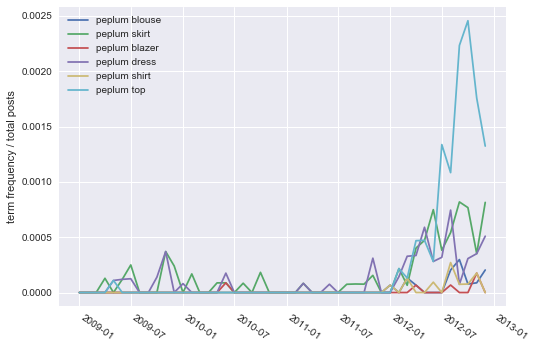

In [23]:
peplum_list = [k for k, v in df2012.count.iteritems() if 'peplum' in k and '_' in k and v > 1]
peplum_list_to_plot = make_trends(peplum_list)
for p in peplum_list_to_plot:
    p.plot_by_month(dfX.df, 1, 2009, 48)
plt.legend()
show_plot()

In [24]:
[(k, v) for k, v in df2012.count.iteritems() if 'floral' in k and '_' in k and v > 10]

[('floral_trousers', 13),
 ('floral_blazer', 25),
 ('floral_shirt', 52),
 ('floral_pants', 103),
 ('floral_blouse', 50),
 ('floral_leggings', 19),
 ('floral_shorts', 49),
 ('floral_romper', 19),
 ('floral_top', 87),
 ('floral_wedges', 13),
 ('floral_skirt', 104),
 ('floral_dress', 264),
 ('floral_jeans', 29)]

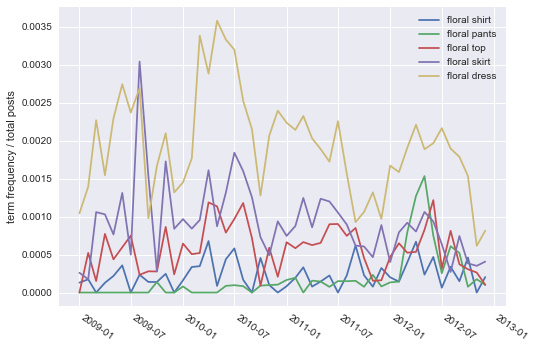

In [25]:
floral_list = [k for k, v in df2012.count.iteritems() if 'floral' in k and '_' in k and v > 50]
floral_list_to_plot = make_trends(floral_list)
for f in floral_list_to_plot:
    f.plot_by_month(dfX.df, 1, 2009, 48)
plt.legend()
show_plot()

At first glance, this makes it look like florals aren't actually a trend; however, the green line, representing 'floral pants', has a major peak in summer 2012. Let's look more closely at other floral pant-like objects.


In [26]:
like_pants = model_base.most_similar('pants')
like_pants = [i[0] for i in like_pants]
like_pants


['trousers',
 'shorts',
 'jeans',
 'pant',
 'jeggings',
 'skinnies',
 'bottoms',
 'leggings',
 'cargos',
 'overalls']

In [27]:
floral_pants = []
for p in like_pants:
    floral_pants.extend([k for k, v in df2012.count.iteritems() \
                                         if 'floral' in k and p in k and '_' in k and v > 1])


floral_pants = set(floral_pants)
floral_pants

{'floral_jeans',
 'floral_leggings',
 'floral_overalls',
 'floral_pant',
 'floral_pants',
 'floral_shorts',
 'floral_skinnies',
 'floral_trousers',
 'floralprint_trousers'}

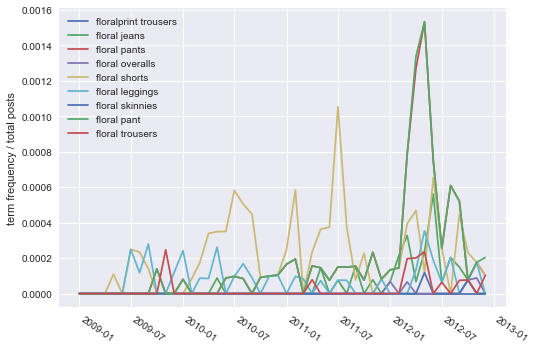

In [28]:
floral_pants_to_plot = make_trends(floral_pants)
for f in floral_pants_to_plot:
    f.plot_by_month(dfX.df, 1, 2009, 48)
show_plot()



In [29]:
[(k, v) for k, v in df2012.count.iteritems() if 'leggings' in k and v > 15]

[('printed_leggings', 25),
 ('floral_leggings', 19),
 ('leggings', 718),
 ('print_leggings', 46),
 ('leather_leggings', 69),
 ('galaxy_leggings', 20)]

In [30]:
leggings = [k for k, v in df2012.count.iteritems() if 'leggings' in k \
                                                                and '_' in k and v > 15]

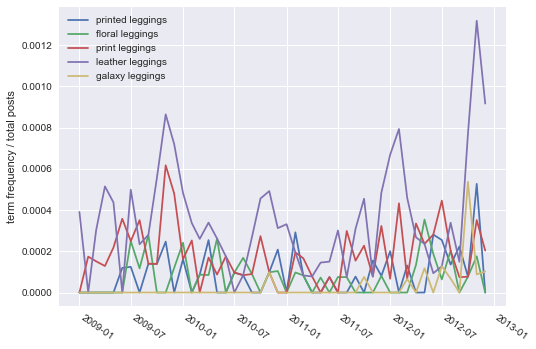

In [31]:
leggings_to_plot = make_trends(leggings)

for l in leggings_to_plot:
    l.plot_by_month(dfX.df, 1, 2009, 48)
show_plot()



In [32]:
galaxy = Trend('galaxy')

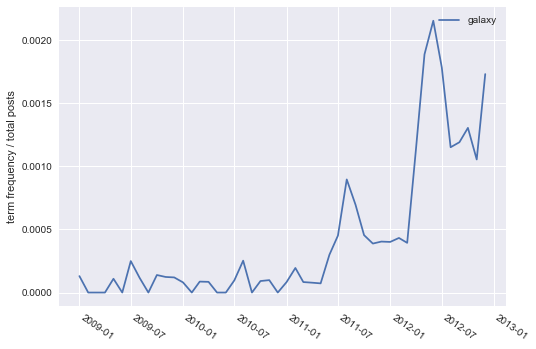

In [33]:
galaxy.plot_by_month(dfX.df, 1, 2009, 48)
show_plot()

In [34]:
[(k, v) for k, v in df2012.count.iteritems() if 'galaxy' in k and '_' in k]

[('galaxy_dress', 1),
 ('galaxy_shorts', 1),
 ('galaxy_shoes', 4),
 ('galaxy_shirt', 5),
 ('galaxy_tote', 3),
 ('galaxy_skirt', 7),
 ('galaxy_tshirt', 2),
 ('galaxy_leggings', 20),
 ('galaxy_wedges', 2),
 ('galaxy_sweater', 2)]

In [35]:
dfY, model = create_TrendDF(2013, 2013)


                are you sure you want to continue?
                2013 is current validation yr 
Enter Y to continue. Press any other key to quitY
now loading year 2013
loading pre-trained Word2Vec model
Now creating bigrams
Creating TrendDF for years 2013 to 2013
Creating counter of all words/bigrams


In [36]:
dfX_Y = pd.concat([dfX.df, dfY.df])

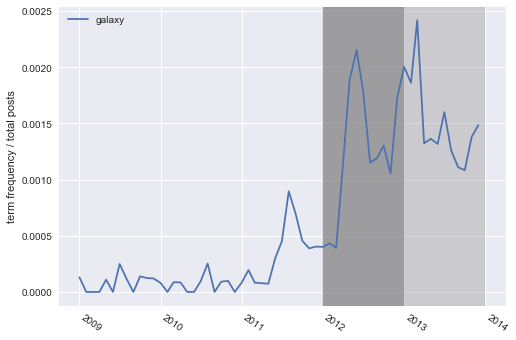

In [37]:
galaxy.plot_by_month(dfX_Y, 1, 2009, 60)
show_plot(2012)

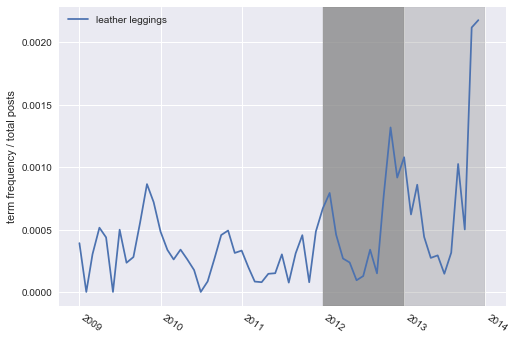

In [38]:
leather_leggings = Trend('leather leggings')
leather_leggings.plot_by_month(dfX_Y, 1, 2009, 60)
show_plot(2012)

In [39]:
def plot_with_highlight(garment):
    trend = Trend(garment)
    trend.plot_by_month(dfX_Y, 1, 2009, 60)
    show_plot(2012)

In [40]:
interesting_terms = ['peplum top', 'floral pants', 'chiffon', 'mullet skirt', 'wedge sneaker'] 

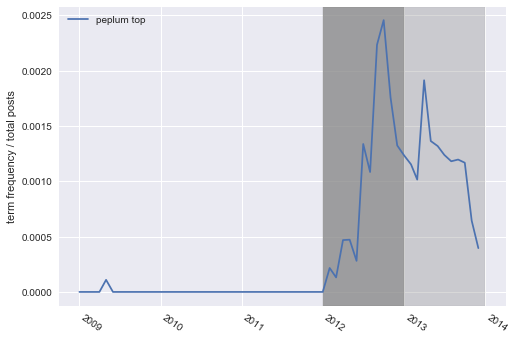

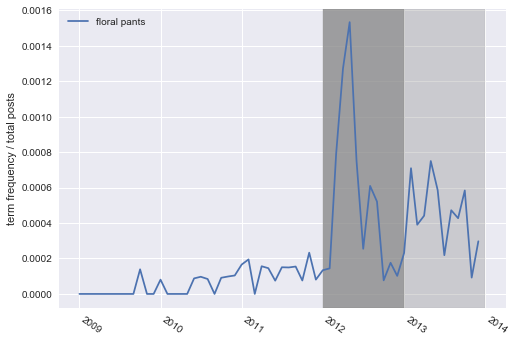

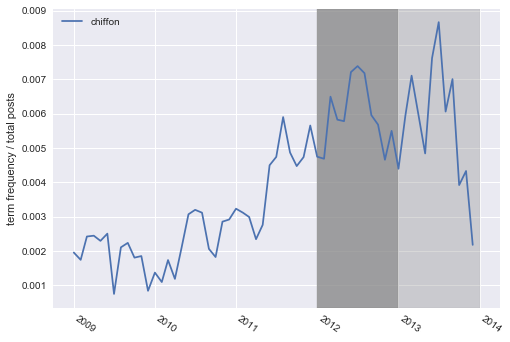

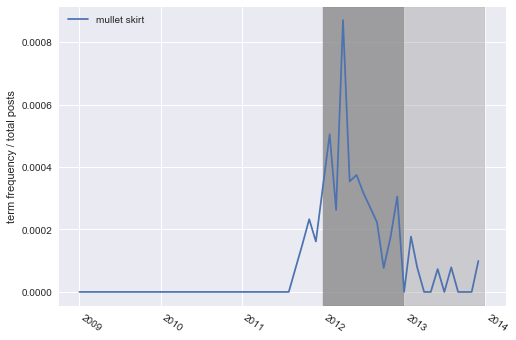

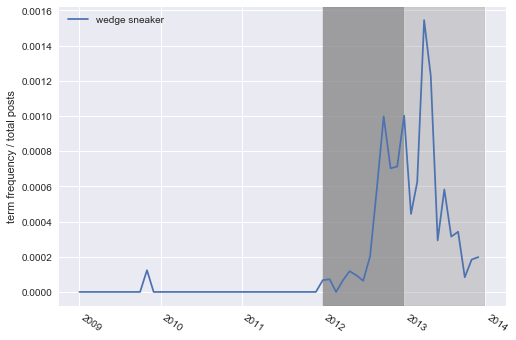

In [41]:
for term in interesting_terms:
    plot_with_highlight(term)